In [ ]:
# import tensorflow as tf
%pip install seaborn

In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

2024-04-15 00:26:00.287959: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 00:26:00.430889: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 00:26:00.430928: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 00:26:00.431445: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 00:26:00.494080: I tensorflow/core/platform/cpu_feature_g

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3857429049547969879
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5788139520
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8790059067439577120
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2024-04-15 00:26:02.741375: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 00:26:02.771766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 00:26:02.771788: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 00:26:02.903592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 00:26:02.903621: I tensorflow/compile

In [2]:
!git clone https://github.com/Annaantonin/Myneuraluq.git

fatal: destination path 'Myneuraluq' already exists and is not an empty directory.


In [5]:
import os
# os.listdir()
# os.chdir('Myneuraluq/neuraluq') 
os.listdir("Myneuraluq")
# os.chdir("/mnt/")

['README.md',
 'SDOF displacement.png',
 '.git',
 'SDOF acceleration known.png',
 'setup.py',
 '__init__.py',
 'Data',
 '__pycache__',
 'SDOF force known.png',
 'Myneuraluq']

In [2]:
# os.chdir("/mnt/")
import  neuraluq.neuraluq as neuq
import neuraluq.neuraluq.variables as neuq_vars
from neuraluq.neuraluq.config import tf

import numpy as np
import scipy.io as sio

from scipy.io import loadmat

import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/Annaantonin/Data.git

In [7]:
import Data as data
# data = sio.loadmat("Data/sdof_2000.mat")

In [ ]:
os.listdir(".")

In [3]:
def load_data(noise):

    # data = sio.loadmat(r"C:\Users\Antonina\My Drive\CU_work\PINN project\sdof_example.mat")
    # data = sio.loadmat("Data/sdof_noforce.mat")
    #  t_x_train, t_f_train = data["t"], data["ymeas"]
    data = sio.loadmat("Data/sdof_tower.mat")
    x_tt_train, t_train = data["a"], data["t"]
    x_train, f_train = data["u"], data["pf"]
    # Input_train=t, x_tt
    # train_x_tt = t_x_tt_train, x_train
    # train_f = t_f_train, f_train
    n=4000
    return  x_tt_train[0:n], t_train[0:n], x_train[0:n], f_train[0:n]


2024-04-15 00:26:14.487587: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 00:26:14.487650: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 00:26:14.487660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 00:26:14.487827: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 00:26:14.487838: I tensorflow/compile

Supporting backend tensorflow.compat.v1

Compiling a Ensemble method

Tensor("Sum:0", shape=(4000,), dtype=float32) f0
Tensor("Reshape:0", shape=(4000, 1), dtype=float32) output
Tensor("clip_by_value_1:0", shape=(), dtype=float32) uz
Tensor("sub_6:0", shape=(4000, 1), dtype=float32) result
Generating 0th sample by deep ensemble...


2024-04-15 00:26:15.381012: W tensorflow/c/c_api.cc:305] Operation '{name:'Variable_14/Assign' id:105 op device:{requested: '', assigned: ''} def:{{{node Variable_14/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](Variable_14, Const_2)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  0 , loss:  230.63857
Iteration:  1000 , loss:  147.26622
Iteration:  2000 , loss:  118.0057
Iteration:  3000 , loss:  106.52138
Iteration:  4000 , loss:  99.2539
Iteration:  5000 , loss:  84.356636
Iteration:  6000 , loss:  80.72272
Iteration:  7000 , loss:  59.62119
Iteration:  8000 , loss:  56.116962
Iteration:  9000 , loss:  45.71937
Iteration:  10000 , loss:  43.895943
Iteration:  11000 , loss:  36.503864
Iteration:  12000 , loss:  35.39417
Iteration:  13000 , loss:  25.730396
Iteration:  14000 , loss:  22.39094
Iteration:  15000 , loss:  12.35251
Iteration:  16000 , loss:  11.010358
Iteration:  17000 , loss:  10.599562
Iteration:  18000 , loss:  9.36557
Iteration:  19000 , loss:  5.5241227
Generating 1th sample by deep ensemble...
Iteration:  0 , loss:  259.08176


2024-04-15 00:27:29.874839: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:1616 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  143.21625
Iteration:  2000 , loss:  122.771225
Iteration:  3000 , loss:  104.2743
Iteration:  4000 , loss:  94.440346
Iteration:  5000 , loss:  85.99304
Iteration:  6000 , loss:  70.96997
Iteration:  7000 , loss:  58.44693
Iteration:  8000 , loss:  69.3552
Iteration:  9000 , loss:  50.557102
Iteration:  10000 , loss:  36.15121
Iteration:  11000 , loss:  34.87002
Iteration:  12000 , loss:  26.029198
Iteration:  13000 , loss:  22.526617
Iteration:  14000 , loss:  20.946276
Iteration:  15000 , loss:  11.5905695
Iteration:  16000 , loss:  12.192082
Iteration:  17000 , loss:  8.634169
Iteration:  18000 , loss:  4.198395
Iteration:  19000 , loss:  4.502447
Generating 2th sample by deep ensemble...
Iteration:  0 , loss:  301.37863


2024-04-15 00:28:43.316638: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:1616 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  133.36911
Iteration:  2000 , loss:  125.954346
Iteration:  3000 , loss:  99.203415
Iteration:  4000 , loss:  92.830475
Iteration:  5000 , loss:  78.50611
Iteration:  6000 , loss:  82.62447
Iteration:  7000 , loss:  64.28483
Iteration:  8000 , loss:  56.935177
Iteration:  9000 , loss:  44.375496
Iteration:  10000 , loss:  33.67335
Iteration:  11000 , loss:  29.974035
Iteration:  12000 , loss:  24.00488
Iteration:  13000 , loss:  18.060444
Iteration:  14000 , loss:  20.58754
Iteration:  15000 , loss:  10.151875
Iteration:  16000 , loss:  10.822153
Iteration:  17000 , loss:  8.841183
Iteration:  18000 , loss:  9.201434
Iteration:  19000 , loss:  6.1162276
Generating 3th sample by deep ensemble...
Iteration:  0 , loss:  255.62784


2024-04-15 00:29:58.512621: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:1616 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  143.99754
Iteration:  2000 , loss:  126.60779
Iteration:  3000 , loss:  115.14465
Iteration:  4000 , loss:  100.1085
Iteration:  5000 , loss:  85.159035
Iteration:  6000 , loss:  62.642914
Iteration:  7000 , loss:  59.78527
Iteration:  8000 , loss:  51.15781
Iteration:  9000 , loss:  46.19572
Iteration:  10000 , loss:  43.65801
Iteration:  11000 , loss:  36.351116
Iteration:  12000 , loss:  28.431122
Iteration:  13000 , loss:  21.07382
Iteration:  14000 , loss:  22.611755
Iteration:  15000 , loss:  14.261838
Iteration:  16000 , loss:  11.01231
Iteration:  17000 , loss:  7.2761655
Iteration:  18000 , loss:  5.379482
Iteration:  19000 , loss:  4.3443704
Generating 4th sample by deep ensemble...
Iteration:  0 , loss:  252.22052


2024-04-15 00:31:13.309793: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:1616 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  153.36644
Iteration:  2000 , loss:  121.41281
Iteration:  3000 , loss:  116.71803
Iteration:  4000 , loss:  82.36192
Iteration:  5000 , loss:  74.384705
Iteration:  6000 , loss:  72.0549
Iteration:  7000 , loss:  58.451393
Iteration:  8000 , loss:  50.38618
Iteration:  9000 , loss:  51.848484
Iteration:  10000 , loss:  36.447884
Iteration:  11000 , loss:  32.83021
Iteration:  12000 , loss:  22.988428
Iteration:  13000 , loss:  19.814909
Iteration:  14000 , loss:  13.97402
Iteration:  15000 , loss:  17.161798
Iteration:  16000 , loss:  9.393023
Iteration:  17000 , loss:  9.468319
Iteration:  18000 , loss:  5.8133607
Iteration:  19000 , loss:  7.54755
Execution time for 'Trainable' function is: 374.824 s, 6.247 mins


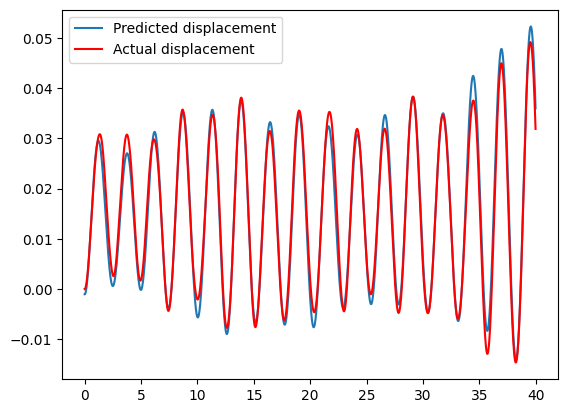

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 16:14:30 2023

@author: Antonina
"""

#%%
# k_system=27000;
# ksi=0.245;
# m=4500; %mass 
# tf.random.set_seed(42)
# Uz was computed using logarithmic law, height for the example was taken as 30 m and the roughness length defined as in urban area:
# U(z)=1.37/0.4*np.log(30/2) 

# The constants and the spectrum for the turbulence fluctuations were taken from  Roncallo, L., Solari, G., Muscolino, G., and Tubino, F. “Maximum dynamic response of linear elastic sdof systems based
# on an evolutionary spectral model for thunderstorm outflows”. Journal of Wind Engineering and Industrial Aerodynamics. 224:104978 (2022)

def pde_init(t,  x): 
    x_t = tf.gradients(x, t)[0]
    return tf.concat([x[0], x_t[0]], axis=-1)

def pde_xtt(t, x, *args):
    x_t = tf.gradients(x, t)                                                                                                                                                                                                                        
    x_tt = tf.gradients(x_t, t)
    return x_tt

def pde_fn(t, x, f,  Uz, log_c, log_k):
    
    Uz=tf.clip_by_value(Uz, clip_value_min=9, clip_value_max=12)
    w = tf.linspace(0.01, 10.0, 1000)  # Frequency array
    phi = tf.random.uniform(shape=[w.shape[0]], minval=0, maxval=2*np.pi, dtype=tf.float32)
    dw = w[1] - w[0]  # Frequency spacing
    Lv = 1.72 #  integral length scale parameter/ 
    S = 6.868 * w * Lv / ((1 + 10.302 * w * Lv) ** (5 / 3))
    Sw = (1.2 * 8 * 0.12 * Uz ** 2) ** 2 * S  # Compute Sw tensor
    cos_term = tf.math.cos(tf.tensordot(w, t[:,0], axes=0) + phi[:, tf.newaxis]) 
    srm_term = tf.sqrt(2 * Sw * dw)[:, tf.newaxis] * cos_term  # Broadcast sqrt_term over t
    f0 = tf.reduce_sum(srm_term, axis=0)  # Reduced turbulence part
    print(f0,'f0')
    f1 = 0.5 * 1.2 * 8 * Uz ** 2  # w_mean part
    output = f0 + f1
    output=tf.reshape(output, [-1, 1]) 
    print(output, 'output')
    # myoutput = output - f # Ensure f is subtracted correctly
    m=4500
    # log_c=tf.clip_by_value(log_c,  clip_value_min=-0.1, clip_value_max=0.3)
    # log_k=tf.clip_by_value(log_k, clip_value_min=-0.5, clip_value_max=0.5) # to make constraints for the parameters
    x_t = tf.gradients(x, t) [0] [..., 0:1]     #velocity                                                                                                                                                                                                                   
    x_tt=output-(0.245*tf.exp(log_c)*x_t + 27000*tf.exp(log_k)*x)
    # x_tt =f-(0.12 * x_t + 700 * x)
    # return [f,x_tt]
    # print(x_tt,'xtt')
    return x_tt/m

def pde_Spec(t,  f, Uz,  *args):
    Uz=tf.clip_by_value(Uz, clip_value_min=9, clip_value_max=12) # slowly-varying mean wind velocity value
    print(Uz,'uz')
    w = tf.linspace(0.01, 10.0, 1000)  # Frequency array
    phi = tf.random.uniform(shape=[w.shape[0]], minval=0, maxval=2*np.pi, dtype=tf.float32)  # Random phase angles
    dw = w[1] - w[0]  # Frequency spacing
    Lv = 1.72 #  integral length scale parameter/ slowly-varying mean Uz

    S = 6.868 * w * Lv / ((1 + 10.302 * w * Lv) ** (5 / 3)) # Turbulence spectrum 
    Sw = (1.2 * 8 * 0.12 * Uz ** 2) ** 2 * S  # Power spectrum (air density*Area of the structure*drag coefficint)*spectrum of turbulent fluctuations

    cos_term = tf.math.cos(tf.tensordot(w, t[:,0], axes=0) + phi[:, tf.newaxis]) 
    
    srm_term = tf.sqrt(2 * Sw * dw)[:, tf.newaxis] * cos_term  # Broadcast sqrt_term over t
    
    f0 = tf.reduce_sum(srm_term, axis=0)  # Reduced turbulence part
   
    f1 = 0.5 * 1.2 * 8 *Uz ** 2  # w_mean part
    output = f0 + f1
    output=tf.reshape(output, [-1, 1]) 
    myoutput = output - f # Ensure f is subtracted correctly
    print(myoutput, 'result')
    return myoutput


@neuq.utils.timer
def Trainable(
    x_tt_train, t_train, x_train, f_train, noise, layers,
):
    # build processes
   
    process_x = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers, activation= tf.math.sin),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# Displacement
    )   
           
    process_f = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers, activation= tf.math.sin),
        posterior=neuq_vars.fnn.Trainable(layers=layers), # Appllied wind force
    ) 
    process_Uz = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=10), #slowly-varying mean wind velocity value
    )
    
    process_log_c = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=0.1), # Damping ratio
    )
    process_log_k = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=0.1), # Stiffness ratio
    )
  
    method = neuq.inferences.DEns(
        num_samples=5, num_iterations=20000, optimizer=tf.train.AdamOptimizer(1e-3), 
    )
   
          
    loss_init = neuq.likelihoods.MSE(
        inputs=t_train[0:1],
        targets=[0,0], 
        processes=[process_x], # tf train
        pde=pde_init,
        multiplier=1,
    )
    loss_x = neuq.likelihoods.MSE(   #Loss xtt
        inputs=t_train,
        targets=x_tt_train,
        processes=[process_x],
        pde=pde_xtt, # dotdot _X
        multiplier=1,
    )    
    
    loss_f = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_tt_train, # minimizing the loss to be close to zero
        # targets=np.zeros_like(t_train), # minimizing the loss to be close to zero
        processes=[process_x, process_f, process_Uz,  process_log_c, process_log_k], # tf train
        pde=pde_fn,
        multiplier=1,
    )
    loss_force = neuq.likelihoods.MSE(   #Loss xtt
        inputs=t_train, # Frequency array, example values,
        targets=np.zeros_like(t_train),
        # targets=f_train,
        processes=[process_f, process_Uz],
        pde=pde_Spec, # dotdot _X
        multiplier=1e-3,
    )   
    
    # loss_force = neuq.likelihoods.MSE(   #Loss xtt
    #     inputs=w_train,
    #     targets=f_train,
    #     processes=[process_phi, process_Uz],
    #     pde=pde_Spec, # dotdot _X
    #     multiplier=1,
    # )    
    likelihoods=[loss_init, loss_x, loss_f, loss_force]
    processes=[process_x, process_f, process_Uz, process_log_c, process_log_k]
     # processes=[process_f]
 
    # build model
    model = neuq.models.Model(
        processes=[process_x, process_f, process_Uz, process_log_c, process_log_k],
        likelihoods=[loss_init,
                     loss_x, 
                     loss_f, 
                     loss_force],
    )
    # assign and compile method
    model.compile(method)
    # obtain posterior samples
    samples = model.run()
    # samples,results = model.run()
    # print("Acceptance rate: %.3f \n" % (np.mean(results)))
    processes=processes 
    likelihoods=likelihoods
    # likelihoods=[]
    return processes, samples, model, likelihoods


if __name__ == "__main__":

    noise = 0.1

    x_tt_train, t_train, x_train, f_train = load_data(noise)

    # t_x_tt_train, x_tt_train = train_x_tt
    # t_f_train, f_train = train_f

    layers = [1, 20, 20,  1]
  
    processes, samples, model, likelihoods = Trainable( x_tt_train, t_train, x_train, f_train, noise, layers )

    x_pred, f_pred, Uz_pred, logc_pred, logk_pred= model.predict(t_train, samples, processes, pde_fn=None)
    
plt.plot(t_train,np.mean(x_pred, axis=(0, 2)),label='Predicted displacement')
plt.plot(t_train, x_train,'r',label='Actual displacement')
plt.legend()

# plt.rcParams['figure.figsize'] = [3,3]
# neuq.utils.hist(np.exp(logk_pred).flatten(),  name="value of $k$" )
# neuq.utils.hist(np.exp(logc_pred).flatten(), bins=30,name="value of $c$")

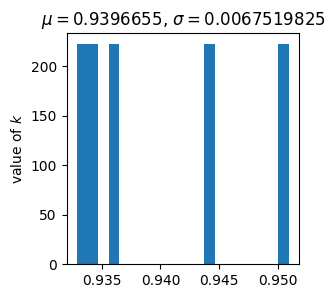

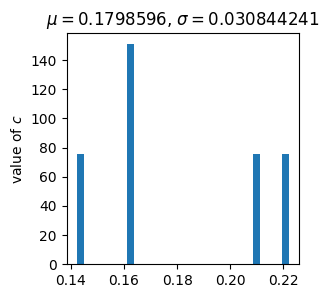

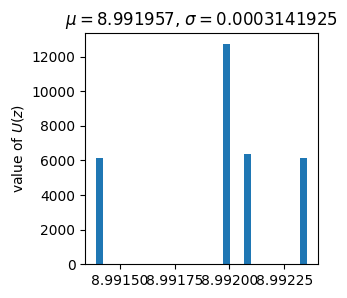

In [5]:
# Plotting the values of interest 
plt.rcParams['figure.figsize'] = [3,3]
neuq.utils.hist(np.exp(logk_pred).flatten(),  name="value of $k$" ) # True must be 1
neuq.utils.hist(np.exp(logc_pred).flatten(), bins=30,name="value of $c$") # True must be 1
neuq.utils.hist(Uz_pred.flatten(), bins=30,  name="value of $U(z)$")# True must be 9.27

In [6]:
# Objective function with revised sizes in order to plot the identified processes

def pde_fn(t, x, f,  Uz, log_c, log_k):
    
    Uz=Uz[0,:,0]
    w = tf.linspace(0.01, 10.0, 1000)  # Frequency array
    phi = tf.random.uniform(shape=[w.shape[0]], minval=0, maxval=2*np.pi, dtype=tf.float32)
    dw = w[1] - w[0]  # Frequency spacing
    Lv = 1.72
    S = 6.868 * w * Lv / ((1 + 10.302 * w * Lv) ** (5 / 3))
    Sw = (1.2 * 8 * 0.12 * Uz ** 2) ** 2 * S  # Compute Sw tensor
    cos_term = tf.math.cos(tf.tensordot(w, t[0,:,0], axes=0) + phi[:, tf.newaxis]) 
    srm_term = tf.sqrt(2 * Sw * dw)[:, tf.newaxis] * cos_term  # Broadcast sqrt_term over t
    print(srm_term)
    f0 = tf.reduce_sum(srm_term, axis=0)  # Reduced turbulence part
    print(f0,'f0')
    f1 = 0.5 * 1.2 * 8 * Uz ** 2  # w_mean part
    output = f0 + f1
    output=tf.reshape(output, [-1, 1]) 
    print(output, 'output')
    # myoutput = output - f # Ensure f is subtracted correctly
    m=4500
    # log_c=tf.clip_by_value(log_c,  clip_value_min=-0.1, clip_value_max=0.3)
    # log_k=tf.clip_by_value(log_k, clip_value_min=-0.5, clip_value_max=0.5) # to make constraints for the parameters
    x_t = tf.gradients(x, t) [0] [..., 0:1]     #velocity                                                                                                                                                                                                                   
    x_tt=output-(0.245*tf.exp(log_c)*x_t + 27000*tf.exp(log_k)*x)
    # x_tt =f-(0.12 * x_t + 700 * x)
    # return [f,x_tt]
    print(x_tt,'xtt')
    return x_tt/m # Acceleration

def pde_Spec(t,  x, f, Uz,  *args):
    w = tf.linspace(0.01, 10.0, 1000)  # Frequency array, example values
    phi = tf.random.uniform(shape=[w.shape[0]], minval=0, maxval=2*np.pi, dtype=tf.float32)
    dw = w[1] - w[0]  # Frequency spacing
    # print(t)
    Uz=Uz[0,:,0]
    Lv = 1.72 # coefficient from thunderstorm records
    print(Uz)
    S = 6.868 * w * Lv / ((1 + 10.302 * w * Lv) ** (5 / 3)) # Turbulence spectrum
    Sw = (1.2 * 8 * 0.12 * Uz ** 2) ** 2 * S  # Power spectrum 

    cos_term = tf.math.cos(tf.tensordot(w, t[0,:,0], axes=0) + phi[:, tf.newaxis]) 
    print(cos_term)
    
    srm_term = tf.sqrt(2 * Sw * dw)[:, tf.newaxis] * cos_term  # Broadcast sqrt_term over t
    
    f0 = tf.reduce_sum(srm_term, axis=0)  # Reduced turbulence part
   
    f1 = 0.5 * 1.2 * 8 *Uz ** 2  # w_mean part
    output = f0 + f1
    output=tf.reshape(output, [-1, 1]) 
    myoutput = output - f # Ensure f is subtracted correctly
    print(myoutput, 'result')
    return myoutput # Should be reduced to zero


In [20]:
(ff_pred, )=model.predict(t_train, samples, processes, pde_fn=pde_Spec)

Tensor("strided_slice_102:0", shape=(1,), dtype=float32)
Tensor("Cos_10:0", shape=(1000, 4000), dtype=float32)
Tensor("sub_25:0", shape=(5, 4000, 1), dtype=float32) result


Tensor("mul_46:0", shape=(1000, 4000), dtype=float32)
Tensor("Sum_10:0", shape=(4000,), dtype=float32) f0
Tensor("Reshape_3:0", shape=(4000, 1), dtype=float32) output
Tensor("sub_11:0", shape=(5, 4000, 1), dtype=float32) xtt


Text(0, 0.5, 'Acceleration $ (m/s^2)$')

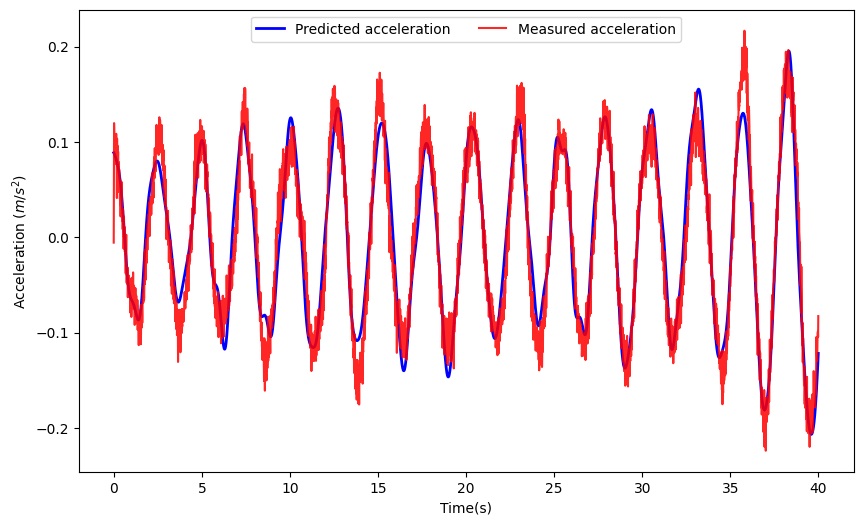

In [8]:
(xtt_pred,) = model.predict(t_train, samples, processes, pde_fn=pde_fn)
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(t_train, np.mean(xtt_pred, axis=(0,2)), 'b', linewidth=2, label='Predicted acceleration')
plt.plot(t_train, x_tt_train,'r', label='Measured acceleration',alpha=0.85)
plt.legend(loc='upper center', ncol=2)
plt.xlabel('Time(s)')
plt.ylabel('Acceleration $ (m/s^2)$')
# plt.savefig('SDOF acceleration known')

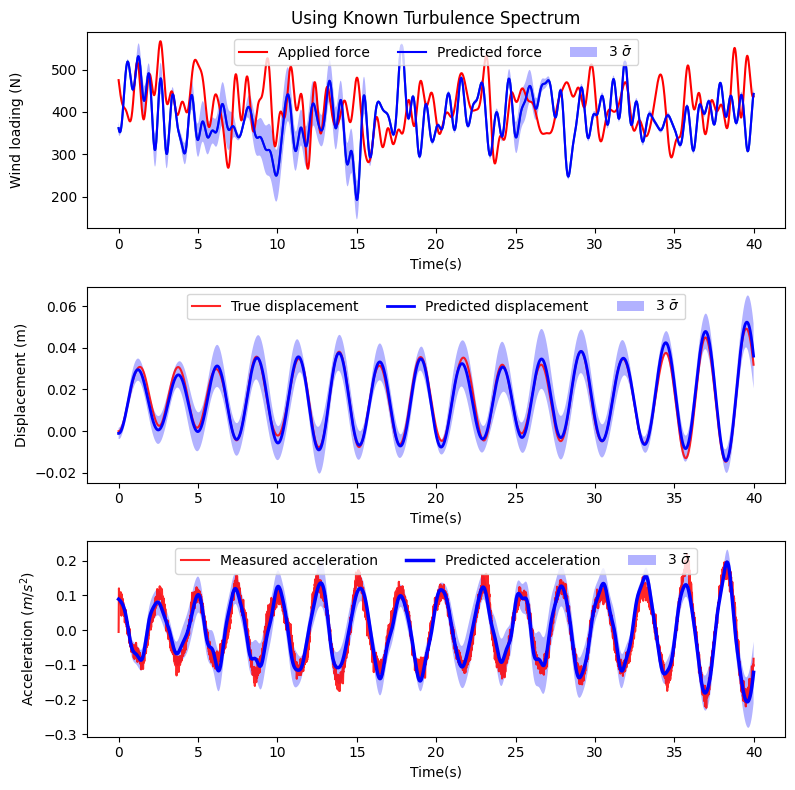

In [21]:


f_mean = np.mean(ff_pred+f_pred, axis=(0,2))
# f_std = np.std(f_pred+ff_pred, axis=0)
f_std = np.std(f_pred, axis=(0,2))
# accelerations
xtt_mean = np.mean(xtt_pred, axis=(0,2))
xtt_std = np.std(xtt_pred, axis=(0,2))
# displacement
x_mean = np.mean(x_pred, axis=(0,2))
x_std = np.std(x_pred, axis=(0,2))
# xtt_std.shape
# Create a 3x1 subplot
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
axs[0].plot(t_train.flatten(), f_mean, 'tab:blue')
axs[0].plot(t_train, f_train, 'r', label='Applied force')
axs[0].plot(t_train, f_mean, "b", label="Predicted force")
axs[0].fill_between(t_train.flatten(),
                 f_mean.flatten() - 3 * np.sqrt(f_std.flatten()**2), 
                 f_mean.flatten() + 3 * np.sqrt(f_std.flatten()**2), alpha=0.3,facecolor="b", label="3 $\\bar{\\sigma}$")

axs[0].set_title('Using Known Turbulence Spectrum')
axs[0].set_xlabel('Time(s)')
axs[0].set_ylabel('Wind loading (N)')
axs[0].legend(loc='upper center', ncol=3)
# axs[0].set_ylim(100, 700) 
# axs[0].set_xlim(0, 40) 
axs[0].yaxis.set_label_coords(-0.09, 0.5)

axs[1].plot(t_train.flatten(), x_train,'r', label='True displacement', alpha=0.85)
axs[1].plot(t_train.flatten(), x_mean, 'b', linewidth=2, label='Predicted displacement')
axs[1].fill_between(t_train.flatten(),
                 x_mean.flatten() - 3 * np.sqrt(x_std.flatten()**2), 
                 x_mean.flatten() + 3 * np.sqrt(x_std.flatten()**2), alpha=0.3, facecolor="b", label="3 $\\bar{\\sigma}$")
axs[1].set_xlabel('Time(s)')
axs[1].set_ylabel('Displacement (m)')
axs[1].legend(loc='upper center', ncol=3)
# Tangent Function
# axs[1].set_xlim(0, 40) 
# axs[0].set_ylim(100, 700)

axs[2].plot(t_train, x_tt_train,'r', label='Measured acceleration',alpha=0.85)
axs[2].plot(t_train, xtt_mean, 'b', linewidth=2.5, label='Predicted acceleration')
axs[2].fill_between(t_train.flatten(),
                 xtt_mean.flatten() - 3 * np.sqrt(xtt_std.flatten()**2), 
                 xtt_mean.flatten() + 3 * np.sqrt(xtt_std.flatten()**2), alpha=0.3,
facecolor="b",
label="3 $\\bar{\\sigma}$")
axs[2].set_xlabel('Time(s)')
axs[2].set_ylabel('Acceleration $ (m/s^2)$')
axs[2].legend(loc='upper center', ncol=3)
# axs[2].set_ylim(-0.3, 0.4) 
# axs[2].set_xlim(0, 40)  # Limit y-axis to avoid extreme values affecting visualization

plt.tight_layout()
plt.show()